<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-luisnegronnaldos/blob/main/Actividad_Semanal_7__A01793865.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=====================================

Nombre: Luis Negrón Naldos

Matrícula: A01793865

=====================================

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [219]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [220]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [221]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

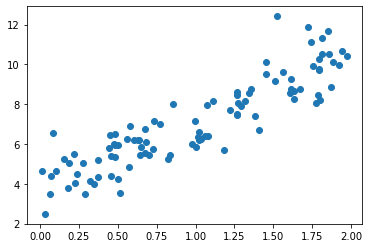

In [222]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [223]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [224]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [225]:
#X_fit[]

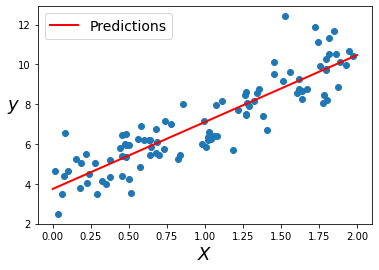

In [226]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [227]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [228]:
X_new.shape

(2, 1)

In [229]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [230]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [231]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [232]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

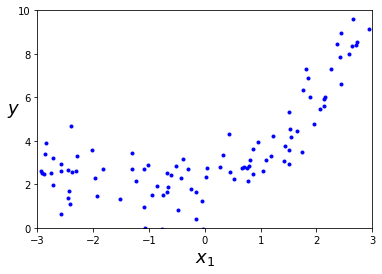

In [233]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [234]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [235]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [236]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [237]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [238]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [239]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

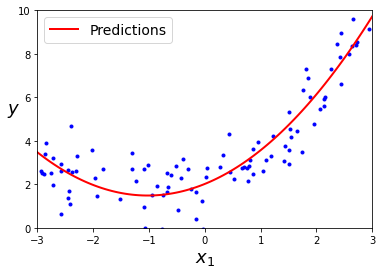

In [240]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [154]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
57,2.354877,42.135353
959,6.920145,28.348770
902,6.128389,29.321686
476,4.339428,40.179907
600,4.794625,43.501171
454,4.292741,40.590196
235,3.488910,46.130645
689,5.101248,45.671991
869,5.915279,32.203796
422,4.206457,50.812349


In [155]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [156]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [157]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

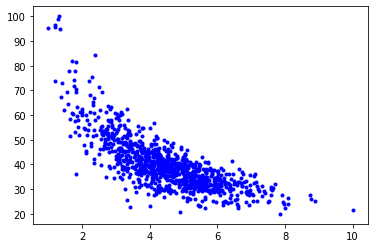

In [158]:
plt.plot(X,y,'b.')

# Ejercicio 1.1 
Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


# Ejercicio 1.2 
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [160]:
#lineal
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


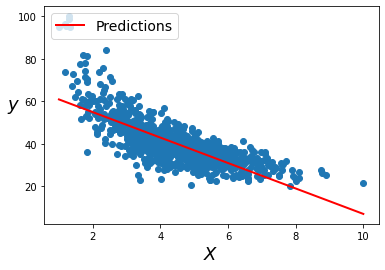

In [161]:
X_fit = np.linspace(1, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [13]:
linear_reg.coef_, linear_reg.intercept_

(array([-5.98882699]), 66.83650741226988)

**ECUACION**

$\hat{y} = 66.83 - 5.98X$

In [162]:
y_pred_entrenamiento = linear_reg.predict(X_train)

In [163]:
#Errores de Entrenamiento 
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred_entrenamiento = linear_reg.predict(X_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_entrenamiento)))
print('r2_score',r2_score(y_train, y_pred_entrenamiento))

Error medio Absoluto (MAE): 4.905332101451236
Root Mean Squared Error: 6.844866083710475
r2_score 0.5746524649404298


In [164]:
#Errores de TEST
y_pred_test = linear_reg.predict(X_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


# Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [165]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_train

array([[ 7.97424764, 63.58862541],
       [ 1.89573077,  3.59379517],
       [ 3.5765014 , 12.79136229],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

In [166]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_test = poly_features.fit_transform(X_test)


In [167]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

**ECUACION**

$\hat{y} = 88.80 - 16.40 X + 1.34 X^2$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


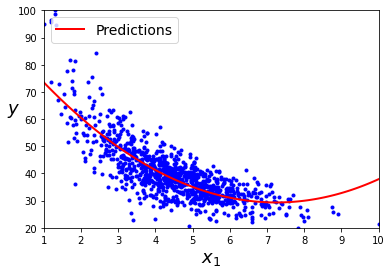

In [168]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 20, 100]);

In [169]:
#Errores de Entrenamiento
y_pred_train = lin_reg.predict(X_poly_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('r2_score',r2_score(y_train, y_pred_train))

Error medio Absoluto (MAE): 4.545086474348086
Root Mean Squared Error: 6.162532575212149
r2_score 0.6552276217097528


In [170]:
y_pred_test = lin_reg.predict(X_poly_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068423
r2_score 0.7385501224942537


# Realiza la regresión con Ridge y Lasso

In [171]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_poly_train, y_train)
ridge_reg.coef_, lin_reg.intercept_


(array([-16.38292464,   1.12892557]), 88.80179909112496)

ECUACION

$\hat{y} = 88.80 - 16.38 X + 1.12 X^2$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


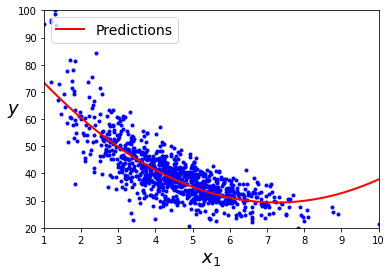

In [172]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 20, 100]);

In [173]:
y_pred_train = ridge_reg.predict(X_poly_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('r2_score',r2_score(y_train, y_pred_train))

Error medio Absoluto (MAE): 4.544607693741813
Root Mean Squared Error: 6.162536064337148
r2_score 0.6552272313006962


In [174]:
y_pred_test = ridge_reg.predict(X_poly_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 4.383221078760819
Root Mean Squared Error: 5.834105447214891
r2_score 0.7384305044873147


**Modelo de Lasso**

In [175]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly_train, y_train)
lasso_reg.coef_, lin_reg.intercept_


(array([-14.9666674 ,   0.98129183]), 88.80179909112496)

ECUACION

$\hat{y} = 88.80 - 14.96 X + 0.98 X^2$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


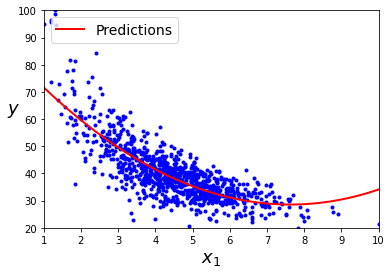

In [176]:
X_new=np.linspace(1, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([1, 10, 20, 100]);

In [177]:
y_pred_train = lasso_reg.predict(X_poly_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('r2_score',r2_score(y_train, y_pred_train))

Error medio Absoluto (MAE): 4.522065264122638
Root Mean Squared Error: 6.175668320741421
r2_score 0.6537562561963224


In [178]:
y_pred_test = lasso_reg.predict(X_poly_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 4.385055190168516
Root Mean Squared Error: 5.9291087345437985
r2_score 0.72984228403894


# GRAFICOS DE MAE Y R2

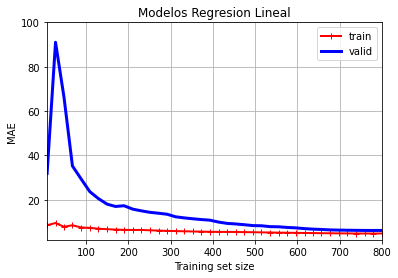

In [203]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Lineal", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 2, 100])

plt.show()

In [204]:
train_sizes

array([  8,  28,  48,  68,  89, 109, 129, 150, 170, 190, 211, 231, 251,
       272, 292, 312, 332, 353, 373, 393, 414, 434, 454, 475, 495, 515,
       536, 556, 576, 596, 617, 637, 657, 678, 698, 718, 739, 759, 779,
       800])

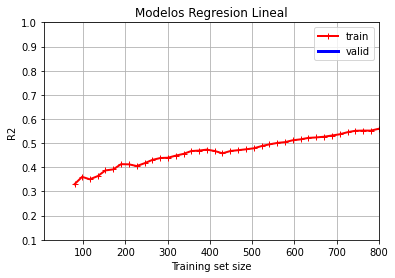

In [206]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.1, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Regresion Lineal", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 0.1, 1])

plt.show()

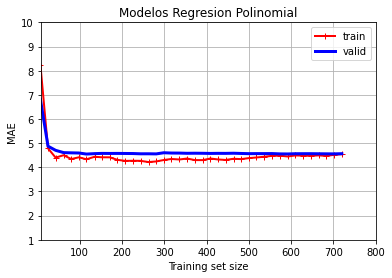

In [210]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Polinomial", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 1, 10])

plt.show()

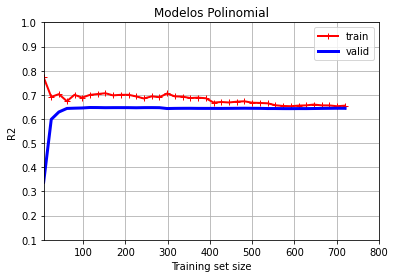

In [211]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Polinomial", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 0.1, 1])

plt.show()

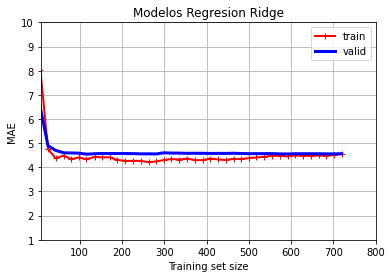

In [212]:
train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=0.1), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Ridge", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 1, 10])

plt.show()

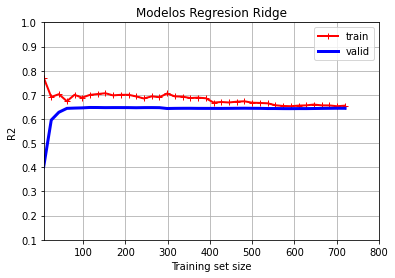

In [213]:
train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=0.1), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Regresion Ridge", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 0.1, 1])

plt.show()

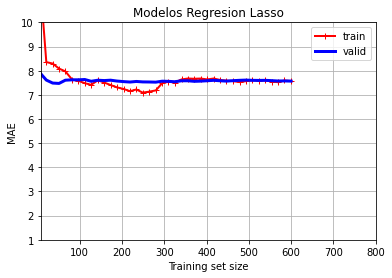

In [215]:
train_sizes, train_scores, valid_scores = learning_curve(
    Lasso(alpha=100, max_iter=1000), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=3,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Lasso", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 1, 10])

plt.show()

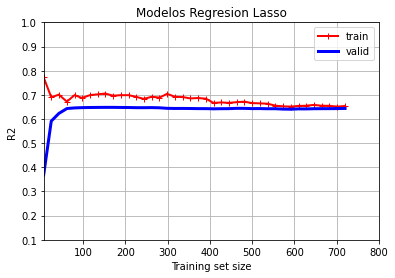

In [216]:
train_sizes, train_scores, valid_scores = learning_curve(
    Lasso(alpha=0.1), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Regresion Lasso", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([8, 800, 0.1, 1])

plt.show()

**Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

En este caso los métodos entre si no han tenido un gran impacto en el resultado final del modelo. Utilizando la métrica de R2, concluy que el mejor modelo es el polinomial de grado 2, puede que con un mayor nivel de grado el ajuste haya sido mayor, pero también se pudo generar un modelo sobre-entrenado. 

**Conclusiones**

1. Para modelos sencillos los efectos de agregar modelos regulados no son significativos, con un modelo polinomial de segundo grado generan un buen ajuste. 
2. Las curvas de entrenamiento muestran de manera constante que los modelos mejora con más datos de entrenamiento, generando un buen ajuste respecto a sus datos de validación. 
3. En este caso el modelo de Lasso generar un performance mejor que el modelo original, debido a que la data no presente mayores problemas de datos extremos. 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [179]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8455,4343800100,20141021T000000,315000.0,3,1.75,1680,7250,1.0,0,0,...,7,930,750,1952,0,98133,47.7201,-122.350,1340,7250
18737,5422950040,20140725T000000,410000.0,5,2.75,2910,5802,2.0,0,0,...,7,2910,0,2006,0,98038,47.3591,-122.036,2910,5000
21128,2564900470,20140714T000000,718500.0,4,2.75,2840,8800,2.0,0,0,...,9,2840,0,2008,0,98033,47.7029,-122.171,1840,7700
1673,7697920060,20140630T000000,285000.0,4,2.25,1830,8734,2.0,0,0,...,7,1830,0,1991,0,98030,47.3679,-122.179,1870,7212
18140,5706202070,20140930T000000,511100.0,4,2.50,1560,12220,1.5,0,0,...,7,1560,0,1965,0,98027,47.5287,-122.053,1920,12220
19048,1702901500,20141121T000000,365000.0,2,1.00,920,6600,1.0,0,0,...,6,920,0,1910,0,98118,47.5572,-122.282,1370,5500
9670,8861000210,20150408T000000,865000.0,3,1.75,1480,8163,1.0,0,0,...,7,1040,440,1953,0,98004,47.6380,-122.206,2170,11124
5266,5561000010,20150223T000000,605000.0,3,2.50,3200,35012,1.5,0,0,...,8,2100,1100,1965,0,98027,47.4651,-121.993,2690,35100
6319,2807100095,20140908T000000,402000.0,4,1.75,1510,9176,1.0,0,0,...,7,1510,0,1957,0,98133,47.7651,-122.339,1480,9176
15128,8944460020,20150305T000000,340000.0,4,2.50,2665,5868,2.0,0,0,...,9,2665,0,2006,0,98030,47.3831,-122.185,2665,6092


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [82]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [83]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


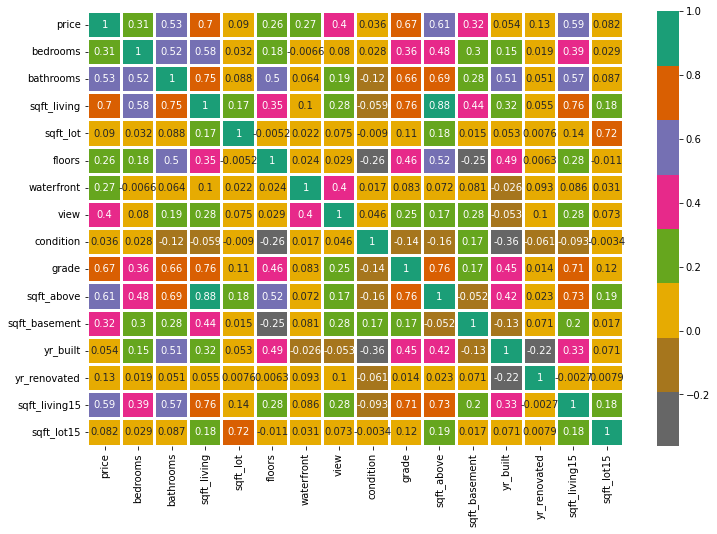

In [84]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [85]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [89]:
#lineal
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [90]:
#COEFICIENTES DE LAS VARIABLES X _ ECUACION
linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

In [91]:
y_pred_entrenamiento = linear_reg.predict(X_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_entrenamiento)))
print('r2_score',r2_score(y_train, y_pred_entrenamiento))

Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


In [93]:
y_pred_test = linear_reg.predict(X_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


# Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [94]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_train

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        9.73440000e+06, 2.26356000e+07, 5.26350250e+07],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        6.25000000e+06, 1.20880000e+08, 2.33791590e+09],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        8.76160000e+06, 3.11214400e+07, 1.10544196e+08],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        2.28010000e+06, 1.15137500e+07, 5.81406250e+07],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        2.14036900e+06, 6.32016000e+06, 1.86624000e+07],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        1.08160000e+06, 8.04960000e+06, 5.99076000e+07]])

In [95]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_test = poly_features.fit_transform(X_test)


In [96]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

In [97]:
#Errores de Entrenamiento
y_pred_train = lin_reg.predict(X_poly_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('r2_score',r2_score(y_train, y_pred_train))

Error medio Absoluto (MAE): 123190.80861039193
Root Mean Squared Error: 182926.52904652644
r2_score 0.7469519325162244


In [98]:
y_pred_test = lin_reg.predict(X_poly_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198


# Realiza la regresión con Ridge y Lasso

In [110]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_poly_train, y_train)
ridge_reg.coef_, lin_reg.intercept_


(array([[ 8.42621237e+05, -8.71501286e+05, -1.56090200e+02,
         -2.79605214e+01, -1.43556644e+06, -7.81137601e+05,
         -4.95769140e+05,  5.19835558e+05,  9.53832255e+05,
         -7.35539356e+02, -5.89140289e+02, -8.79671187e+04,
         -3.04308693e+03,  4.09028766e+03, -3.32422254e+01,
          9.62340810e+02,  6.61863158e+03,  6.56785504e+02,
         -2.00226794e-02,  7.11401159e+03, -2.31307820e+04,
          1.54498197e+02, -5.00736254e+03, -5.53333868e+03,
         -6.70841721e+02, -6.85026112e+02, -4.18845768e+02,
         -8.12510642e+00,  1.67292765e+01,  2.11600376e-01,
         -8.58940237e+03, -3.86849803e+02, -1.31862208e-01,
         -2.16923669e+04,  6.40504717e+04,  2.10817082e+03,
         -2.71196021e+03,  2.12570981e+04,  4.15986420e+02,
          4.04117370e+02,  3.92377621e+02, -1.89230918e+01,
         -1.53859490e+01, -5.14555440e-02,  7.90412514e+02,
          5.98531770e+02, -1.61461591e+02, -7.35063592e+02,
          1.00844149e+02, -1.90551025e+0

In [111]:
y_pred_train = ridge_reg.predict(X_poly_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('r2_score',r2_score(y_train, y_pred_train))

Error medio Absoluto (MAE): 123226.27422678734
Root Mean Squared Error: 183013.7641893687
r2_score 0.7467105246899841


In [112]:
y_pred_test = ridge_reg.predict(X_poly_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 121264.02201075925
Root Mean Squared Error: 186281.11398935644
r2_score 0.7797460209593644


**Modelo de Lasso**

In [113]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly_train, y_train)
lasso_reg.coef_, lin_reg.intercept_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([ 1.25635647e+05,  1.54290641e+05,  7.92596956e+01, -3.03164749e+00,
        -4.70182821e+04,  3.41936930e+05,  7.36673732e+04,  1.35580140e+05,
         1.80420161e+05, -1.83432483e+02, -6.11966200e+01, -3.81843660e+03,
        -2.48334689e+02,  1.34716557e+02, -1.53438643e+00,  1.07511258e+03,
        -3.10200497e+03, -2.05528780e+01, -1.79173965e-01,  8.12528030e+03,
        -2.24103956e+04, -8.57717040e+01, -1.71980634e+03, -3.86234645e+03,
         7.52613486e+00,  3.00938917e-01, -6.24556965e+01,  3.93947295e-02,
         1.88875408e+01,  2.66480392e-01,  1.16611093e+03,  4.55894050e+01,
        -2.29341857e-02, -2.69459638e+04,  5.45518249e+04,  6.03284663e+03,
        -1.99637398e+04,  1.80657147e+04, -1.33141982e+01, -3.78823670e+01,
        -6.85651765e+01, -2.72527660e+01, -3.38941271e+01,  1.37042260e-01,
         1.96413009e-02, -1.72852493e-04,  4.38782923e+00, -9.70138684e+01,
         3.24894239e+01, -1.25229591e+01,  2.25072465e+01, -5.33925150e-02,
         2.7

In [114]:
y_pred_train = lasso_reg.predict(X_poly_train)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('r2_score',r2_score(y_train, y_pred_train))

Error medio Absoluto (MAE): 124944.9838894542
Root Mean Squared Error: 185746.24941955038
r2_score 0.7390905894103803


In [115]:
y_pred_test = lasso_reg.predict(X_poly_test)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score',r2_score(y_test, y_pred_test))

Error medio Absoluto (MAE): 122442.49286885232
Root Mean Squared Error: 187920.41772823734
r2_score 0.7758524230465759


# GRAFICOS DE MAE Y R2

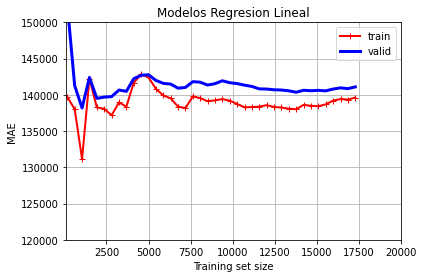

In [134]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Lineal", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 120000, 150000])

plt.show()

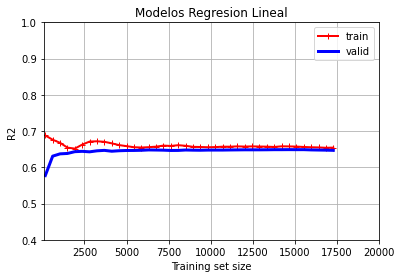

In [135]:


train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Regresion Lineal", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 0.4, 1])

plt.show()

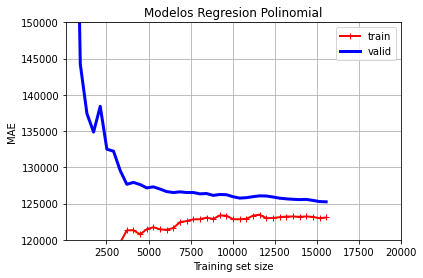

In [136]:


train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Polinomial", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 120000, 150000])

plt.show()

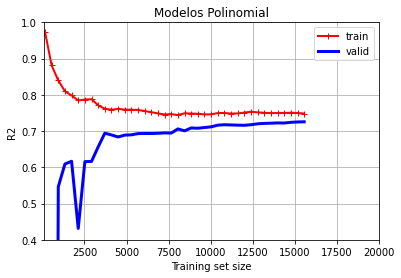

In [137]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Polinomial", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 0.4, 1])

plt.show()

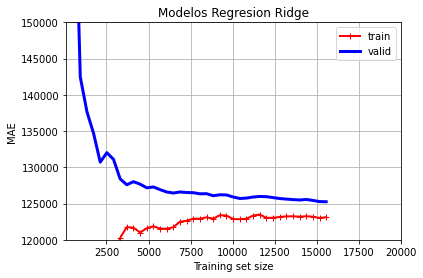

In [151]:
train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=0.1), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Ridge", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 120000, 150000])

plt.show()

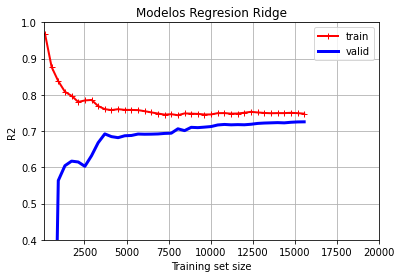

In [152]:
train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=0.1), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Regresion Ridge", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 0.4, 1])

plt.show()

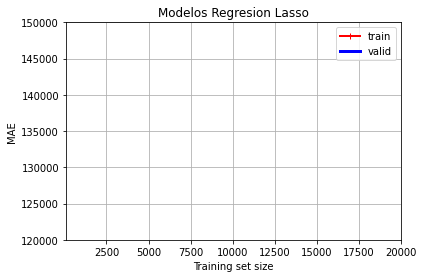

In [217]:
train_sizes, train_scores, valid_scores = learning_curve(
    Lasso(alpha=100, max_iter=10000), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=3,
    scoring="neg_mean_absolute_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.title("Modelos Regresion Lasso", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 120000, 150000])

plt.show()

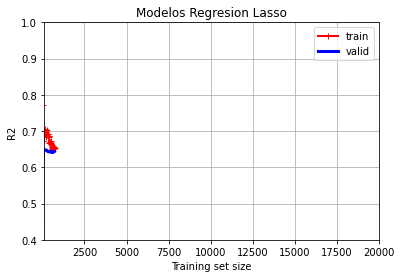

In [218]:
train_sizes, train_scores, valid_scores = learning_curve(
    Lasso(alpha=0.1), X_poly_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="r2")

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.title("Modelos Regresion Lasso", fontdict=None, loc='center')
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.grid()
plt.legend(loc="upper right")
plt.axis([100, 20000, 0.4, 1])

plt.show()

**Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Al igual que en el caso anterior el modelo polinomial ha generado un buen ajuste y no hay mayor mejora en el mismo con los dos modelos regislados.  

Utilizando la métrica de R2, concluye que el mejor modelo es el polinomial de grado 2, puede que con un mayor nivel de grado el ajuste haya sido mayor, pero también se pudo generar un modelo sobre-entrenado. 

**Conclusiones**

1. Para modelos sencillos los efectos de agregar modelos regulados no son significativos, con un modelo polinomial de segundo grado generan un buen ajuste, esta conclusión se valida respecto al anterior ejercicio, no hubo gran impacto con el uso de modelos regulados. 
2. Las curvas de entrenamiento muestran de manera constante que los modelos mejora con más datos de entrenamiento, generando un buen ajuste respecto a sus datos de validación.
3. En este caso el modelo de Lasso generar un performance mejor que el modelo original, debido a que la data no presente mayores problemas de datos extremos. En el caso de la gráfica del modelo de Lasso se generaron alerta de "no convergencia del modelo", por ello las gráficas no fueron realizadas. 